## Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


In [185]:
#pip install pandas matplotlib seaborn

In [187]:
import pandas as pd

df = pd.read_csv('ICUAdmissions.csv')
df['Status'] = df['Status'].map({0: 'survived', 1:'dead'})
df.head()

,ID,Status,Age,Sex,Race,Service,Cancer,Renal,Infection,CPR,...,HeartRate,Previous,Type,Fracture,PO2,PH,PCO2,Bicarbonate,Creatinine,Consciousness
0,8,survived,27,1,1,0,0,0,1,0,...,88,0,1,0,0,0,0,0,0,1
1,12,survived,59,0,1,0,0,0,0,0,...,80,1,1,0,0,0,0,0,0,1
2,14,survived,77,0,1,1,0,0,0,0,...,70,0,0,0,0,0,0,0,0,1
3,28,survived,54,0,1,0,0,0,1,0,...,103,0,1,1,0,0,0,0,0,1
4,32,survived,87,1,1,1,0,0,1,0,...,154,1,1,0,0,0,0,0,0,1


### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### Important terminology clarification

- feature
- variable
- attribute

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


In [192]:
# Example 1: 

In [194]:
# Example 2: 

In [196]:
# Example 3: 

### Basic data visualization choices

Here is a general guidline for the type of plots: 

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot 

#### One categorical: bar plot

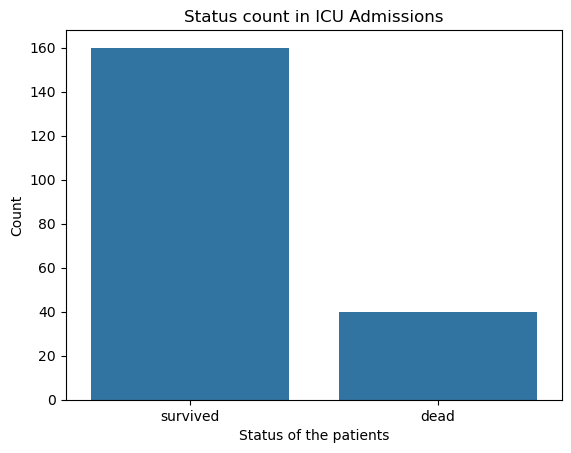

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = df, x = 'Status')
plt.title('Status count in ICU Admissions')
plt.xlabel("Status of the patients")
plt.ylabel('Count')
plt.show()

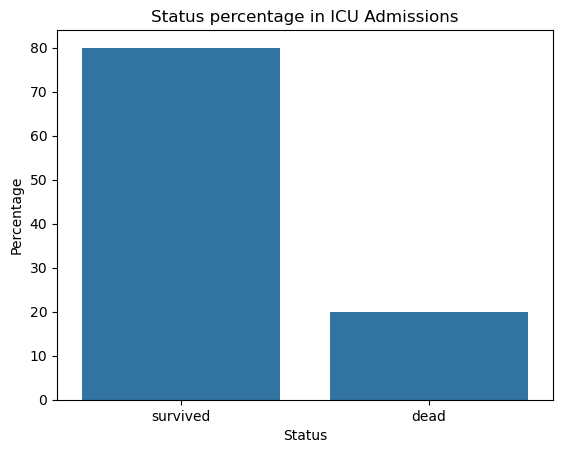

In [202]:
status_counts = df['Status'].value_counts(normalize = True)*100
status_counts

sns.barplot(x = status_counts.index, y = status_counts.values)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Status percentage in ICU Admissions')
plt.show()

In [204]:

# Display the percentage values above the bars (optional)
#for i, value in enumerate(status_counts.values):
#    plt.text(i, value + 1, f'{value:.2f}%', ha='center')
#plt.show()

##### What to write about a bar plot



#### One continous: histogram/density plot/boxplot

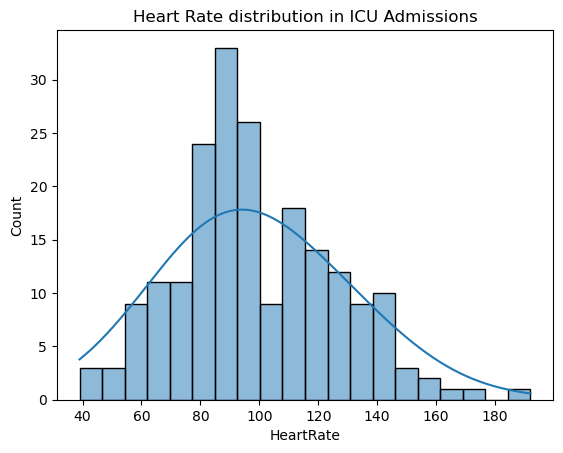

In [208]:
sns.histplot(df['HeartRate'], bins = 20, kde = True, kde_kws = {'bw_method': 0.8})
plt.title('Heart Rate distribution in ICU Admissions')
plt.show()

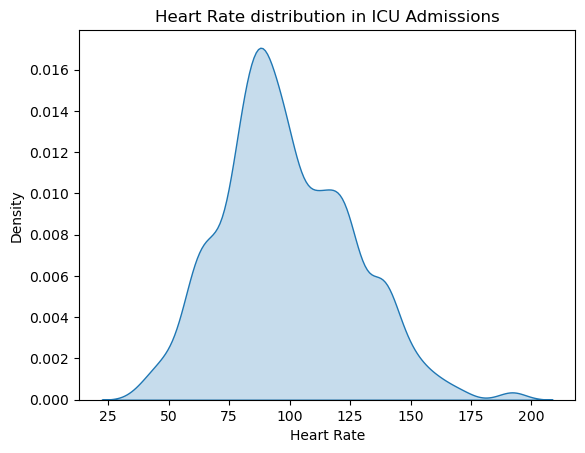

In [210]:
sns.kdeplot(df['HeartRate'], bw_adjust = 0.6, fill = True)
plt.xlabel('Heart Rate')
plt.ylabel("Density")
plt.title('Heart Rate distribution in ICU Admissions')
plt.show()

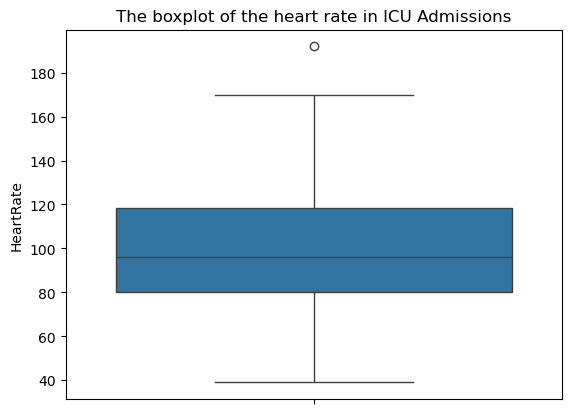

In [212]:
sns.boxplot(data = df, y = 'HeartRate')
plt.title('The boxplot of the heart rate in ICU Admissions')
plt.show()

In [214]:
df['HeartRate'].describe()

count    200.00000
mean      98.92500
std       26.82962
min       39.00000
25%       80.00000
50%       96.00000
75%      118.25000
max      192.00000
Name: HeartRate, dtype: float64

##### Difference between histogram/density plot/ boxplot

- Histogram and density plot emphasizes on the distribution (shape) of the data
- Boxplot emphasizes the statistics of the data (median, IQR)
- Boxplot cannot catch the distribution information, like bi-mode
- Histogram needs to choose the bin number and density plot needs to choose the bandwidth

##### Difference between histogram and bar plot

- Histogram is for the continous variable while bar plot is for the cateogrical variable
- Historgram is almost always veritical but bar plot can be horizontal
- Histogram usually does not have spaces between bars while bar plot can have
- Histogram's bar cannot change the order but bar plot can

##### What to write about a histogram/density plot

- shape(skewness and mode)
- majority of the data (typical value = mean $\pm$ sd)
- potential outlier

<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">

##### What to write about a box plot

- can comment on the skewness of the data but the shape
- majority of the data (IQR)
- potential outlier

boxplot: The figure is a boxplot of heart rate in ICU admissions. In the figure, 

#### Two continous: scatter plot

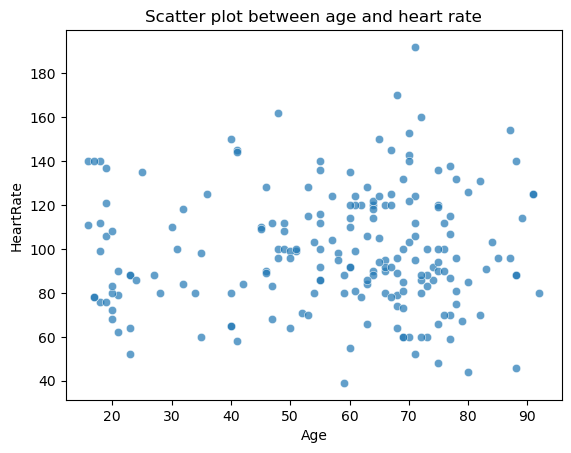

In [223]:
sns.scatterplot(x = 'Age', y = 'HeartRate', data = df, alpha = 0.7)
plt.title('Scatter plot between age and heart rate')
plt.show()

##### What to write about a scatter plot

- trend (linear, non-linear, no trend)
- outliers (if any)
- clusters (if any)

The figure is a scatter plot between age and heart rate in ICU admissions. In the figure, there is no clear trend between the age and heart rate. There is also no point that is far away from the others and no clear clustering patterns.


#### Some bad example of the scatter plot

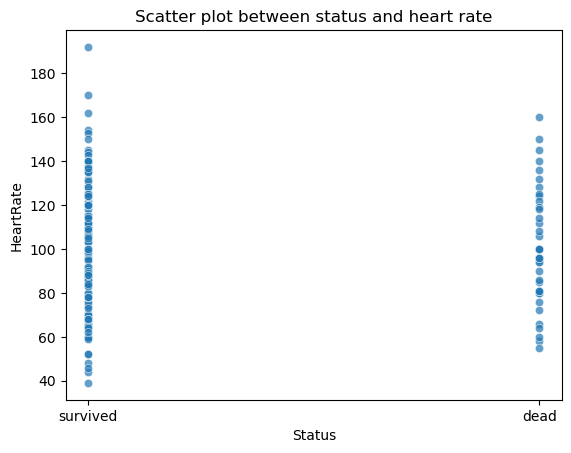

In [227]:
sns.scatterplot(x = 'Status', y = 'HeartRate', data = df, alpha = 0.7)
plt.title('Scatter plot between status and heart rate')
plt.show()

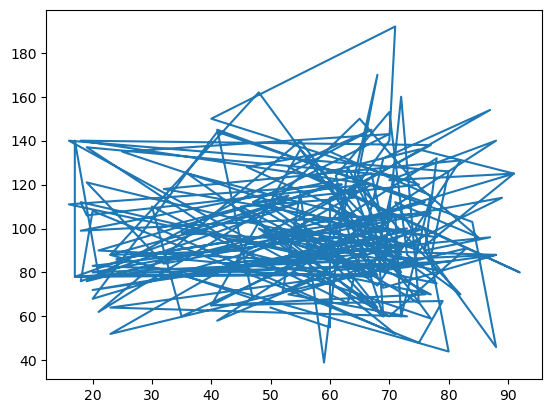

In [229]:
plt.plot(df['Age'], df['HeartRate'])

#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side density plot

In [3]:
sns.boxplot(x = 'Status', y = 'HeartRate', data = df, color = 'white')
plt.title('Side-by-side boxplot for the heart rate across different status')
plt.show()

NameError: name 'sns' is not defined

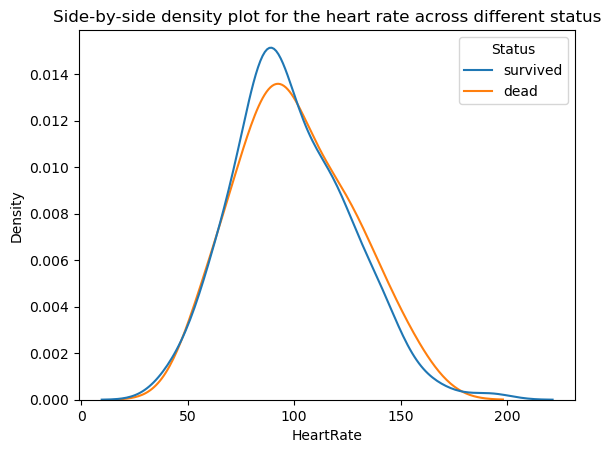

In [234]:
sns.kdeplot(data = df, x = "HeartRate", hue = "Status", common_norm = False)
plt.title("Side-by-side density plot for the heart rate across different status")
plt.show()

##### What to write about a side-by-side boxplot or density plot

- Highlight the difference
- for the boxplot, declare whether the boxes are overlapped

Boxplot: The figure is a side-by-side boxplot for the heart rate across different survival status. In the figure, the boxes are overlapped, which means that there might not exist a statistically signficiant difference between the two groups in heart rate.



#### Two categorical: side-by-side bar plot

In [238]:
df["CPR"] = df['CPR'].map({0: 'no', 1:'yes'})

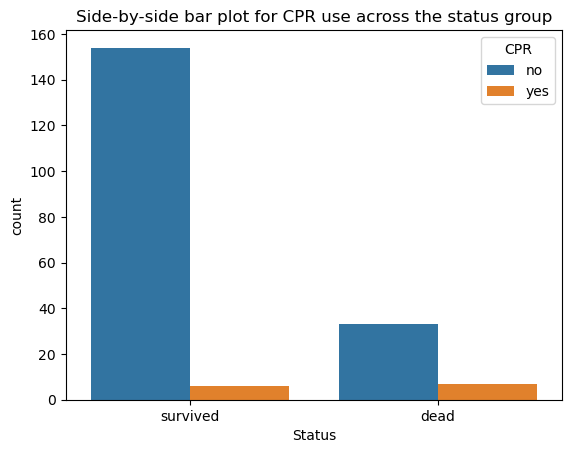

In [240]:
sns.countplot(x = 'Status', hue = 'CPR', data = df)
plt.title('Side-by-side bar plot for CPR use across the status group')
plt.show()

In [242]:
proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = "all")
proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = "columns")
proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = "columns")

proportion_table

CPR,no,yes
Status,,
dead,0.176471,0.538462
survived,0.823529,0.461538


Text(0.5, 1.0, 'stacked bar plot of CPR percentage use by status')

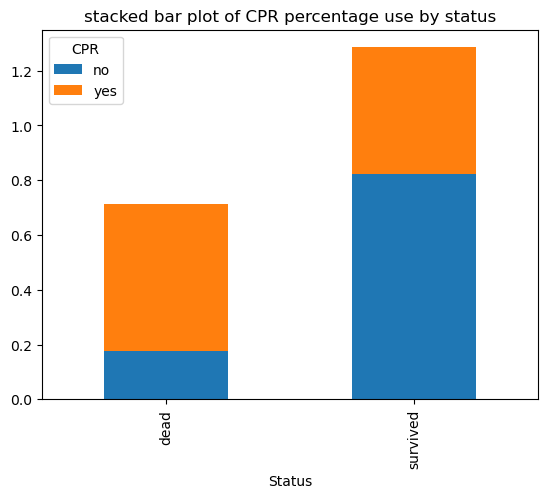

In [244]:
proportion_table.plot(kind = 'bar', stacked = True)
plt.title("stacked bar plot of CPR percentage use by status")

##### What to write about a side-by-side bar plot

- highlight the difference

The figure is a stacked bar plot of percentage of CPR use across different survival status. In the figure, there is a higher proportion of the patients use CPR in the non-survival group vs. the survival group. Which may indicate the CPR use is related to the survival status.

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [248]:
titanic_data = sns.load_dataset('titanic')
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [250]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [252]:
titanic_data = titanic_data.dropna() # drop null values

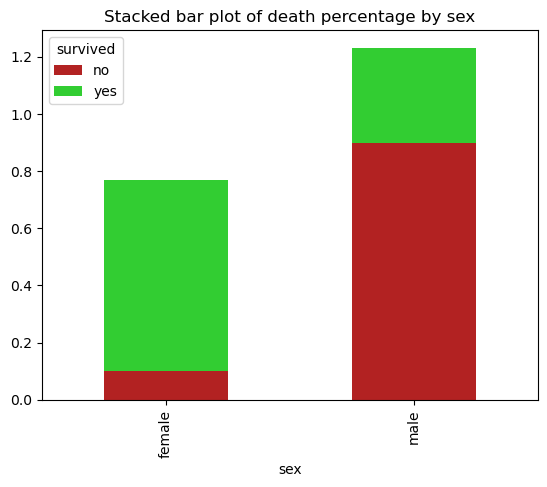

In [254]:
titanic_data["survived"] = titanic_data['survived'].map({0: 'no', 1:'yes'})

proportion_table = pd.crosstab(titanic_data['sex'], titanic_data['survived'], normalize = "columns")

proportion_table.plot(kind = 'bar', stacked = True, color={'yes': 'limegreen', 'no': 'firebrick'})
plt.title("Stacked bar plot of death percentage by sex")
plt.savefig("stacked_sex_plot.png",dpi=300, bbox_inches="tight")

The figure is a stacked bar plot of percentage survival rate use across different sexes. In the figure, there is a higher proportion people who survive in the female group vs. the male group. This may indicate that people whose sex were female were prioritized during rescue efforts.

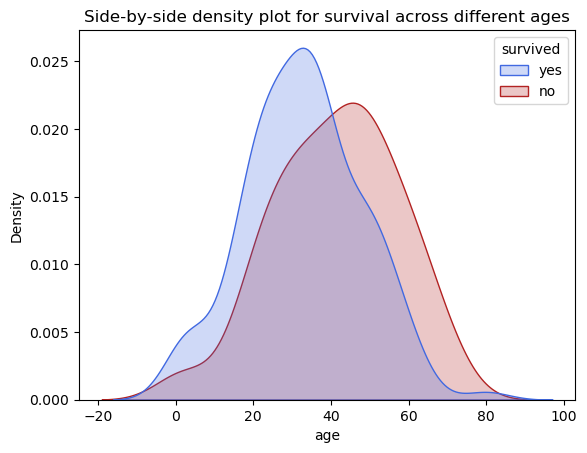

In [271]:
sns.kdeplot(data = titanic_data, x = "age", hue = "survived", common_norm = False, palette={"yes": "royalblue", "no": "firebrick"}, fill=True)
plt.title("Side-by-side density plot for survival across different ages")
plt.savefig("density_age_plot.png",dpi=300, bbox_inches="tight")
plt.show()

The figure is a side-by-side density plot that shows the distribution of survival across age. The survival group shows the group that survive has a lower mean age than the group that didn't survive with the majority being around 

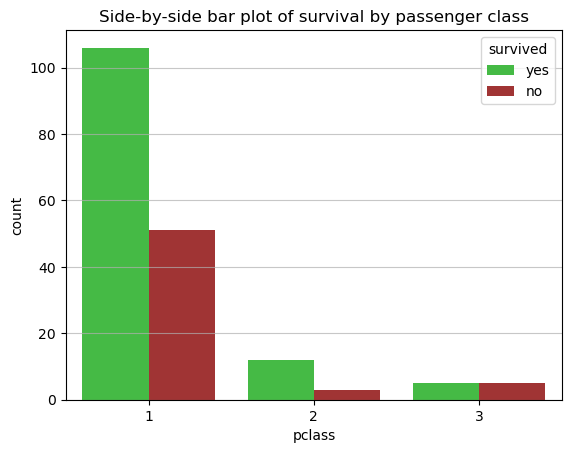

In [277]:
sns.countplot(x = 'pclass', hue = 'survived', data = titanic_data, palette={'yes': 'limegreen', 'no': 'firebrick'})
plt.title("Side-by-side bar plot of survival by passenger class")
plt.grid(True, which='major', axis='y', linestyle='-', alpha=0.7)
plt.savefig("class_bar_plot.png",dpi=300, bbox_inches="tight")
plt.show()

#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?